# Tasks for laboratory assignment 2

In [16]:
# imports section

import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [17]:
import json

def extract_texts_from_file(file_path):
    texts = []
    
    # Open the JSON file
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        
        # Flatten and collect all strings within the JSON structure
        def collect_texts(d):
            if isinstance(d, dict):
                for value in d.values():
                    collect_texts(value)
            elif isinstance(d, list):
                for item in d:
                    collect_texts(item)
            elif isinstance(d, str):
                texts.append(d)
        
        collect_texts(data)
    
    return texts

texts = extract_texts_from_file('resources/data.json')
print(texts)

['Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.', "Oppenheimer captures the life of the 'father of the atomic bomb' and his internal conflict after the success of the Manhattan Project. The film's complex narrative reflects on the cost of scientific achievement.", 'In Oppenheimer, Cillian Murphy delivers a riveting performance as the conflicted physicist who grapples with the consequences of his groundbreaking work on the atomic bomb, under the weight of global politics and ethics.', 'Oppenheimer is a cinematic exploration of ambition, guilt, and responsibility. Through stunning visuals and a thought-provoking story, Nolan brings the life of the brilliant but haunted physicist to the big screen.', 'Ducks are versatile waterfowl, known for their adaptability in freshwater and coastal habitats. With webbed feet and waterpr

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [18]:
def process_texts(texts):
    processed_texts = []
    lemmatizer = WordNetLemmatizer()
    spell = Speller(lang='en')
    stop_words = set(stopwords.words('english'))

    # Dictionary of common abbreviations to expand
    abbreviations = {
        "e.g.": "for example",
        "i.e.": "that is",
        "etc.": "and so on",
        "vs.": "versus",
        "c.f.": "compare",
        "q.v.": "which see",
        "n.b.": "note well",
        "p.a.": "per annum",
        "a.k.a.": "also known as",
        "b.c.": "before Christ",
        "a.d.": "anno Domini",
        "R&D": "research and development"
    }

    for text in texts:
        # Step 1: Lowercasing
        text = text.lower()

        # Step 2: Remove punctuation, special characters, and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Step 3: Expand abbreviations
        words = text.split()
        words = [abbreviations.get(word, word) for word in words]

        # Step 4: Remove stopwords and apply spelling correction
        words = [spell(word) for word in words if word not in stop_words]

        # Step 5: Lemmatization
        words = [lemmatizer.lemmatize(word, pos='v') for word in words]

        # Join the words back into a single string
        processed_text = ' '.join(words)
        processed_texts.append(processed_text)  # Store only the processed text

    return processed_texts

# Example usage with your provided JSON structure
texts_processed = process_texts(texts)

# Print only the processed texts
for processed in texts_processed:
    print(processed)

oppenheimer direct christopher nolan elves life j robert oppenheimer theoretical physicist lead development atomic bomb film explore moral emotional struggle
oppenheimer capture life father atomic bomb internal conflict success manhattan project film complex narrative reflect cost scientific achievement
oppenheimer million murphy deliver rivet performance conflict physicist grapes consequences groundbreaking work atomic bomb weight global politics ethics
oppenheimer cinematic exploration ambition guilt responsibility stun visuals thoughtprovoking story nolan bring life brilliant haunt physicist big screen
duck versatile waterfowl know adaptability freshwater coastal habitats web feet waterproof feather excellent swimmers migrate long distance find food warmer climates
lamp spider talk yesterday fly nobody notice except coaster watch blue smell better today doors laugh understand whisper secrets orange sock
duck communicate use range vocalization include quack whistle grant social bird 

## Visualize as cloud of words

Visualize the texts as a cloud of words.

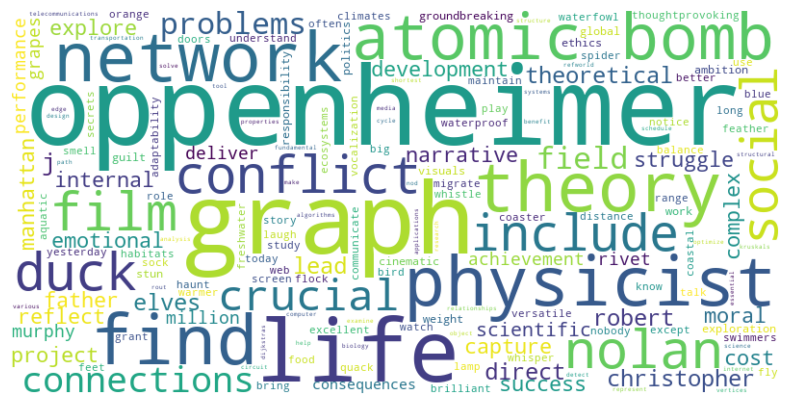

In [19]:
def visualize_texts(texts_processed):
    all_text = ' '.join(texts_processed)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

visualize_texts(texts_processed)

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_tfidf(texts_processed):

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts_processed)

    # Calculate cosine similarity matrix
    cosine_matrix = cosine_similarity(tfidf_matrix)
    return cosine_matrix

cosine_matrix = calculate_tfidf(texts_processed)
print(cosine_matrix)

[[1.         0.20393314 0.15728092 0.16548245 0.         0.
  0.         0.         0.         0.        ]
 [0.20393314 1.         0.14452467 0.06228693 0.         0.
  0.         0.         0.         0.        ]
 [0.15728092 0.14452467 1.         0.06173851 0.         0.
  0.         0.         0.         0.        ]
 [0.16548245 0.06228693 0.06173851 1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.06425395 0.         0.02970318 0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.06425395 0.
  1.         0.0348577  0.06996013 0.03535539]
 [0.         0.         0.         0.         0.         0.
  0.0348577  1.         0.12250997 0.10152244]
 [0.         0.         0.         0.         0.02970318 0.
  0.06996013 0.12250997 1.         0.19081021]
 [0.         0.         0.         0.

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

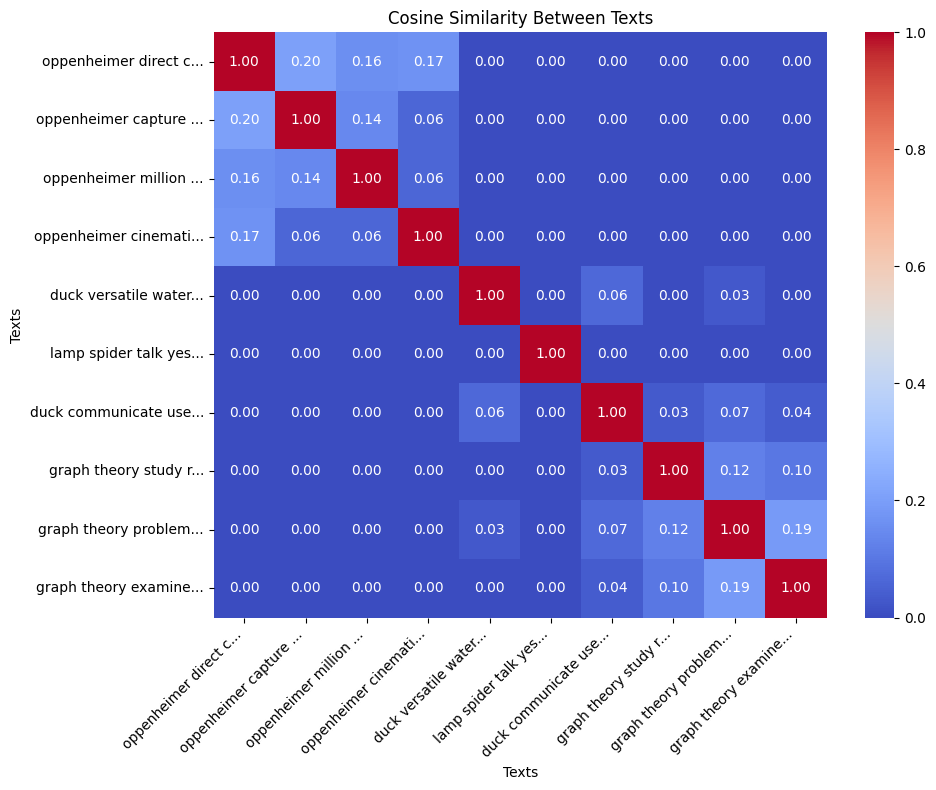

In [22]:
import seaborn as sns

def visualize_data(cosine_matrix, texts_processed):
    # Generate labels using the first few words of each text
    labels = [text[:20] + '...' if len(text) > 20 else text for text in texts_processed]
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Create a heatmap with annotations
    sns.heatmap(cosine_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=labels, yticklabels=labels)

    # Set plot labels and title
    plt.xlabel("Texts")
    plt.ylabel("Texts")
    plt.title("Cosine Similarity Between Texts")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Display the plot
    plt.tight_layout()
    plt.show()


visualize_data(cosine_matrix, texts_processed)

## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

['unlike dog cat sweet tooth scientists believe due mutation key taste receptor', 'cat chase prey keep head level dog humans bob head', 'technical term cat handball bear', 'group cat call lower', 'cat cant climb head first tree every claw cat paw point way get tree cat must back', 'cat make different sound dog make', 'every year nearly four million cat eat asia', 'million domestic cat world approximately recognize breed', 'approximately cat skin make coat', 'commonly think ancient egyptian first domesticate cat oldest know pet cat recently find yearly grave mediterranean island cyprus grave predate early egyptian art depict cat years']


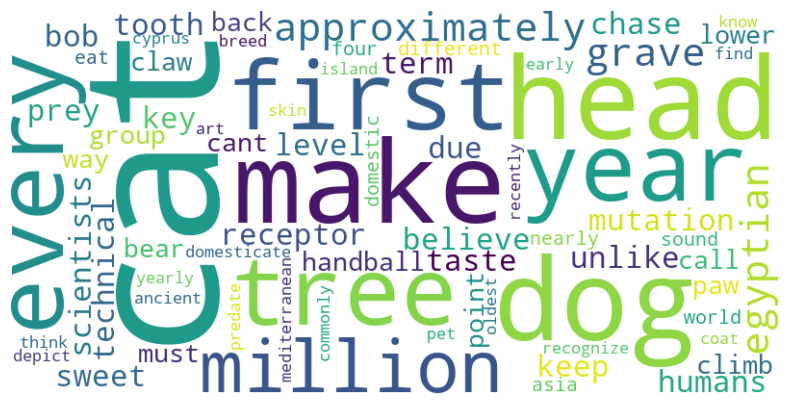

[[1.         0.06816504 0.0205558  0.02360614 0.03097306 0.08931411
  0.01629604 0.01769563 0.02209012 0.02372296]
 [0.06816504 1.         0.02171335 0.02493546 0.14802808 0.09434361
  0.01721371 0.01869211 0.02333407 0.02505886]
 [0.0205558  0.02171335 1.         0.03794755 0.04979008 0.02845019
  0.02619634 0.02844623 0.03551049 0.03813534]
 [0.02360614 0.02493546 0.03794755 1.         0.05717859 0.03267201
  0.0300837  0.03266745 0.04078001 0.04379436]
 [0.03097306 0.14802808 0.04979008 0.05717859 1.         0.04286817
  0.10903123 0.0428622  0.05350649 0.09121512]
 [0.08931411 0.09434361 0.02845019 0.03267201 0.04286817 1.
  0.02255448 0.02449158 0.35384246 0.03283369]
 [0.01629604 0.01721371 0.02619634 0.0300837  0.10903123 0.02255448
  1.         0.14177352 0.02815168 0.03023258]
 [0.01769563 0.01869211 0.02844623 0.03266745 0.0428622  0.02449158
  0.14177352 1.         0.19218132 0.03282911]
 [0.02209012 0.02333407 0.03551049 0.04078001 0.05350649 0.35384246
  0.02815168 0.19218

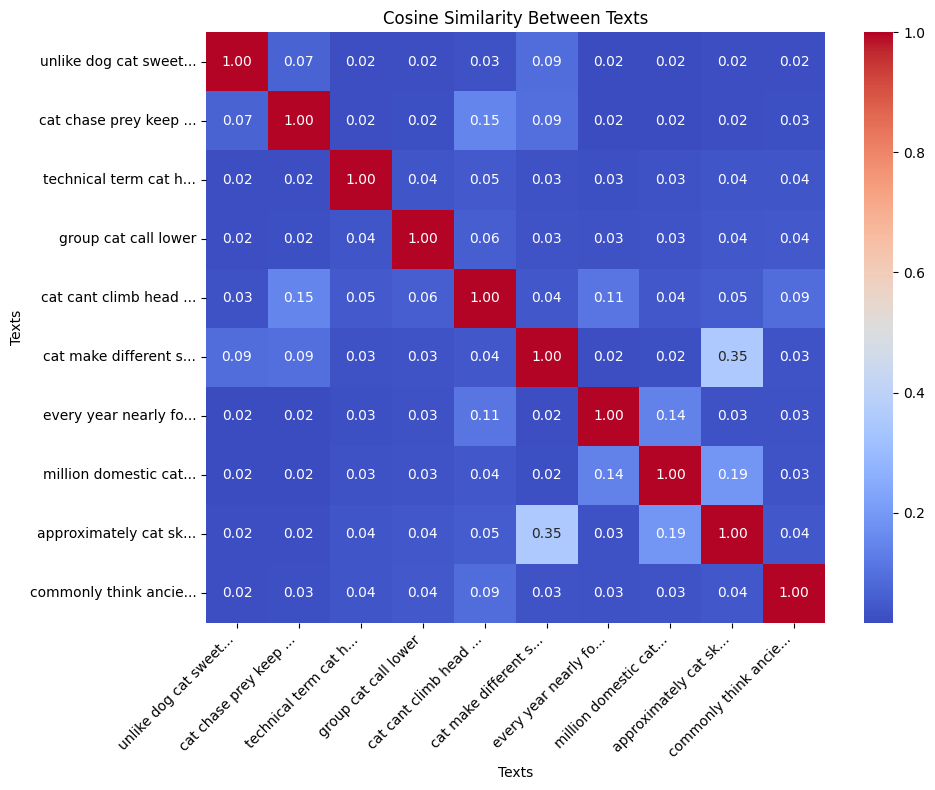

In [26]:
import requests

def get_texts():
    url = "https://catfact.ninja/facts"
    response = requests.get(url)
    data = response.json()
    texts = [fact['fact'] for fact in data['data']]
    return texts

texts = get_texts()

texts_processed = process_texts(texts)
print(texts_processed)

visualize_texts(texts_processed)

cosine_matrix = calculate_tfidf(texts_processed)
print(cosine_matrix)

visualize_data(cosine_matrix, texts_processed)